### 10 Academy: Artificial Intelligence Mastery
#### Week 8 and 9 Challenges  
#### Project: Improved detection of fraud cases for e-commerce and bank transactions
##### Model Building and Training 
Ethel.C 

In [1]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\scripts'
src_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\src'
# Load the datasets
creditcard_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_credit_Data.csv")
fraud_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv")
fraud_data = fraud_data.drop(columns=['device_id', 'ip_address'])
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)


In [2]:
print("\nFraud Data:")
fraud_data.head()


Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,sex,age,class,purchase_hour,transaction_frequency,transaction_velocity,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uzbekistan,country_Viet Nam,country_Virgin Islands (U.S.),country_Zambia
0,22058,1424818549,1429325231,0.172414,1,0.679914,0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,0,2.304476,0,1,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,1,2.304476,1,18,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,150084,1430255605,1430747690,0.241379,1,0.911994,0,13,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,221365,1437462592,1441824053,0.206897,1,1.376155,0,18,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
print("\nCredit Cared Data:")
creditcard_data.head()


Credit Cared Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,hour_of_day,Amount_scaled,Amount_binned_1,Amount_binned_2,Amount_binned_3,Amount_binned_medium,Amount_binned_high,Amount_binned
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,0.0,0.244964,0,1,0,1,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,0.0,-0.342475,1,0,0,0,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,0.0,1.160686,0,0,0,0,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,0.0,0.140534,0,1,0,1,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,0.0,-0.073403,0,1,0,1,0,2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from model_training import (
    train_logistic_regression, train_decision_tree, train_random_forest,
    train_xgboost, train_mlp, train_rnn, train_lstm,evaluate_models
)

In [5]:
# Separate features and target
X_credit = creditcard_data.drop(columns=['Class'])
y_credit = creditcard_data['Class']

X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

# Split data
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(
    X_credit, y_credit, test_size=0.3, random_state=42, stratify=y_credit
)

X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud
)


In [6]:
# Scale data
scaler = StandardScaler()
X_credit_train_scaled = scaler.fit_transform(X_credit_train)
X_credit_test_scaled = scaler.transform(X_credit_test)

X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)

# Train and evaluate models
models = {
    "LogisticRegression": train_logistic_regression,
    "DecisionTree": train_decision_tree,
    "RandomForest": train_random_forest,
    "XGBoost": train_xgboost,
    "MLP": train_mlp,
    "RNN": train_rnn,
    "LSTM": train_lstm,
}

##### Model Evaluation Fraud Detection 


Training LogisticRegression...
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41089
           1       0.95      0.05      0.10      4245

    accuracy                           0.91     45334
   macro avg       0.93      0.52      0.52     45334
weighted avg       0.91      0.91      0.87     45334

ROC-AUC Score: 0.5249544834461297



Training DecisionTree...
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     41089
           1       0.50      0.56      0.53      4245

    accuracy                           0.91     45334
   macro avg       0.72      0.75      0.74     45334
weighted avg       0.91      0.91      0.91     45334

ROC-AUC Score: 0.7512105484142397



Training RandomForest...
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.95      0.53      0.68      4245

    accuracy                           0.95     45334
   macro avg       0.95      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334

ROC-AUC Score: 0.7658440248108611



Training XGBoost...
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.78      0.54      0.64      4245

    accuracy                           0.94     45334
   macro avg       0.87      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334

ROC-AUC Score: 0.7621319184724726



Training MLP...
MLP Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41089
           1       0.85      0.53      0.66      4245

    accuracy                           0.95     45334
   macro avg       0.90      0.76      0.81     45334
weighted avg       0.94      0.95      0.94     45334

ROC-AUC Score: 0.7626480207103654



Training RNN...
X_train_sm shape after SMOTE: (191744, 158)
X_test shape before reshaping: (45334, 1, 158)


e:\DS+ML\AIM3\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7842 - loss: 0.5025 - val_accuracy: 0.5808 - val_loss: 0.6577
Epoch 2/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8239 - loss: 0.4244 - val_accuracy: 0.5660 - val_loss: 0.7146
Epoch 3/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8244 - loss: 0.4163 - val_accuracy: 0.5735 - val_loss: 0.6344
Epoch 4/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8271 - loss: 0.4064 - val_accuracy: 0.5705 - val_loss: 0.6846
Epoch 5/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8296 - loss: 0.3976 - val_accuracy: 0.5836 - val_loss: 0.6080
Epoch 6/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8288 - loss: 0.3972 - val_accuracy: 0.5861 - val_loss: 0.6073
Epoch 7/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8316 - loss: 0.3905 - val_accuracy: 0.5764 - val_loss: 0.6951
Epoch 8/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8332 - loss: 0.3859

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step

Training LSTM...
X_train shape before SMOTE: (105778, 1, 158)
X_test shape before reshaping: (45334, 1, 158)
X_train_sm shape after SMOTE: (191744, 158)


e:\DS+ML\AIM3\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7707 - loss: 0.5020 - val_accuracy: 0.5763 - val_loss: 0.6779
Epoch 2/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8235 - loss: 0.4271 - val_accuracy: 0.5791 - val_loss: 0.6349
Epoch 3/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8262 - loss: 0.4135 - val_accuracy: 0.5806 - val_loss: 0.5878
Epoch 4/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8295 - loss: 0.4023 - val_accuracy: 0.5782 - val_loss: 0.6483
Epoch 5/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8299 - loss: 0.3959 - val_accuracy: 0.5890 - val_loss: 0.6417
Epoch 6/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8336 - loss: 0.3875 - val_accuracy: 0.6015 - val_loss: 0.6062
Epoch 7/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8387 - loss: 0.3761 - val_accuracy: 0.6069 - val_loss: 0.5907
Epoch 8/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8400 - loss: 0.3690 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step

Final Model Metrics: {'LogisticRegression': {'accuracy': 0.910817487978118, 'precision': 0.9508928571428571, 'recall': 0.05017667844522968, 'f1_score': 0.09532333855448646}, 'DecisionTree': {'accuracy': 0.9055013896854458, 'precision': 0.4959417273673257, 'recall': 0.5613663133097762, 'f1_score': 0.5266298342541437}, 'RandomForest': {'accuracy': 0.9538536197997088, 'precision': 0.9513626834381551, 'recall': 0.5345111896348645, 'f1_score': 0.6844645550527904}, 'XGBoost': {'accuracy': 0.9429126042264084, 'precision': 0.7832478632478632, 'recall': 0.5396937573616019, 'f1_score': 0.6390516039051604}, 'MLP': {'accuracy': 0.9476772400405876, 'precision': 0.8508804795803672, 'recall': 0.5349823321554771, 'f1_score': 0.6569279722302575}, 'RNN': {'accuracy': 0.9228393700092645, 'precision': 0.5950623568337999, 'recall': 0.5507656065959953, 'f1_score': 0.5720577440665525}, 'LSTM': {'accuracy': 0.9061190276613579, 'precision': 0.4988423489791623, 'recall': 

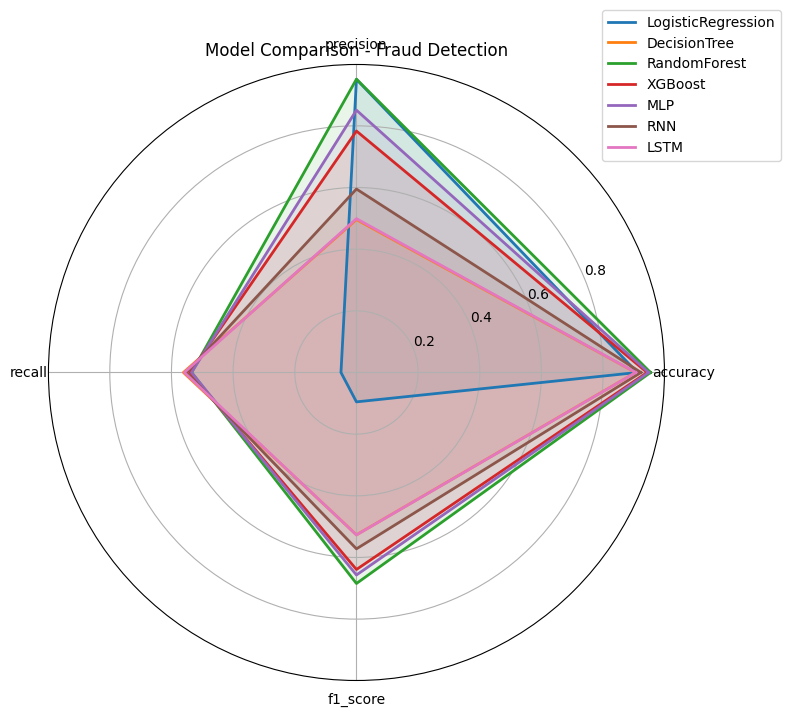

In [7]:
evaluate_models(models, X_fraud_train_scaled, y_fraud_train, X_fraud_test_scaled, y_fraud_test, "Fraud Detection")

Random Forest appears to be the best model for fraud detection. It achieves a high precision of 95% for the fraudulent class (1) while maintaining a recall of 53%, meaning it captures a reasonable number of actual fraud cases without generating too many false positives. Additionally, its ROC-AUC score of 0.7658 is the highest among all models, indicating a good balance between true positive and false positive rates. While XGBoost and MLP also perform well, their slightly lower ROC-AUC scores suggest that they may not generalize as effectively as Random Forest. Logistic Regression performs poorly, especially in recall (5%), meaning it fails to detect most fraud cases despite its high accuracy. Decision Tree shows an improvement over Logistic Regression but does not surpass Random Forest in terms of overall effectiveness. Given these factors, Random Forest is the best choice because it provides the best trade-off between precision, recall, and overall classification performance, making it suitable for fraud detection where minimizing false negatives is crucial.

##### Model Evaluation for Credit Card 


Training LogisticRegression...
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8073386402992476



Training DecisionTree...
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.71      0.74       148

    accuracy                           1.00     85443
   macro avg       0.89      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8545597314883322



Training RandomForest...
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8547121437047576



Training XGBoost...
XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8918098237753552



Training MLP...
MLP Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.75      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8748651738085468



Training RNN...
X_train_sm shape after SMOTE: (398040, 38)
X_test shape before reshaping: (85443, 1, 38)
Epoch 1/15


e:\DS+ML\AIM3\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9787 - loss: 0.0612 - val_accuracy: 0.9994 - val_loss: 0.0070
Epoch 2/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 3/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 7.2255e-04
Epoch 4/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 5/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9987 - val_loss: 0.0032
Epoch 6/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 7/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 6.5571e-04
Epoch 8/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9997 - loss: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step

Training LSTM...
X_train shape before SMOTE: (199364, 1, 38)
X_test shape before reshaping: (85443, 1, 38)
X_train_sm shape after SMOTE: (398040, 38)
Epoch 1/15


e:\DS+ML\AIM3\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9785 - loss: 0.0743 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 2/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9989 - val_loss: 0.0050
Epoch 3/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 3.1179e-04
Epoch 4/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 5/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.8895e-04
Epoch 6/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9999 - loss: 7.4956e-04 - val_accuracy: 1.0000 - val_loss: 2.2784e-04
Epoch 7/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9998 - loss: 7.7423e-04 - val_accuracy: 1.0000 - val_loss: 8.0676e-05
Epoch 8/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step

Final Model Metrics: {'LogisticRegression': {'accuracy': 0.9991456292499094, 'precision': 0.8504672897196262, 'recall': 0.6148648648648649, 'f1_score': 0.7137254901960784}, 'DecisionTree': {'accuracy': 0.9991573329588147, 'precision': 0.7835820895522388, 'recall': 0.7094594594594594, 'f1_score': 0.7446808510638298}, 'RandomForest': {'accuracy': 0.9994616293903538, 'precision': 0.9722222222222222, 'recall': 0.7094594594594594, 'f1_score': 0.8203125}, 'XGBoost': {'accuracy': 0.9994616293903538, 'precision': 0.8923076923076924, 'recall': 0.7837837837837838, 'f1_score': 0.8345323741007195}, 'MLP': {'accuracy': 0.9992977774656788, 'precision': 0.8283582089552238, 'recall': 0.75, 'f1_score': 0.7872340425531915}, 'RNN': {'accuracy': 0.9991456292499094, 'precision': 0.7483443708609272, 'recall': 0.7635135135135135, 'f1_score': 0.7558528428093646}, 'LSTM': {'accuracy': 0.9991456292499094, 'precision': 0.7516778523489933, 'recall': 0.7567567567567568, 'f1_

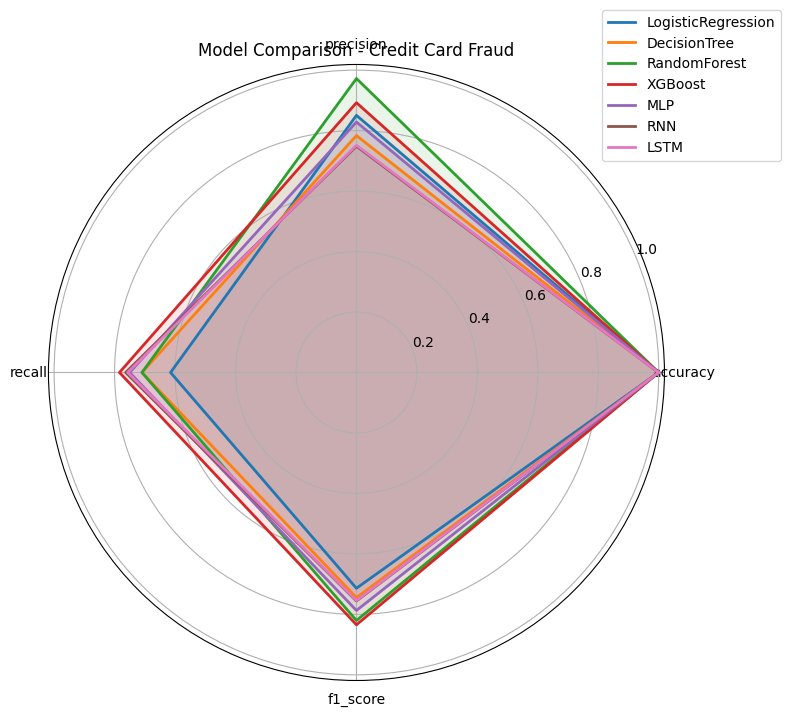

In [8]:
evaluate_models(models, X_credit_train_scaled, y_credit_train, X_credit_test_scaled, y_credit_test, "Credit Card Fraud")

ROC-AUC scores are higher for the models like Random Forest and XGBoost, which suggests that these models have a better overall ability to discriminate between classes.
#### Model Selection 

Since Random Forest model have better performance for both fraud_dataset(e-commerce) and credit card(bank transaction) 
RANDOM FOREST IS SELECTED for hyperparameter tuning, model interpretation and deployment
